<a href="https://colab.research.google.com/github/Rustemhak/dl-pract-ai-talent-hub/blob/main/road.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clear ML

In [1]:
pip install clearml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


In [ ]:
%env CLEARML_API_ACCESS_KEY=XMVD269983H1EYOLZQFG
%env CLEARML_API_SECRET_KEY=Jyd0fAJpcWUHwqLimcPnYa7aBDSVLGtfRAhWn6LwfLmydTxlLs

In [3]:
from clearml import Task

Task.set_credentials(
    api_host='https://api.clear.ml',
    web_host='https://app.clear.ml',
    files_host='https://files.clear.ml',
    key='XMVD269983H1EYOLZQFG',
    secret='Jyd0fAJpcWUHwqLimcPnYa7aBDSVLGtfRAhWn6LwfLmydTxlLs'
)

task = Task.init(project_name='Road_Yolo8', task_name='Road Adam 30 epochs lr 0.001')


ClearML Task: created new task id=a719e4b1a8af447f990b1b53082fdc3b
2023-11-23 10:01:47,622 - clearml.Task - INFO - No repository found, storing script code instead
ClearML results page: https://app.clear.ml/projects/4b2ac5332877413aa6cf3eebcf0a19bb/experiments/a719e4b1a8af447f990b1b53082fdc3b/output/log


In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


Установим YOLOv8

In [5]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

Экспорт из Roboflow

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="pIebj5J25hk6HjWetiu8")
project = rf.workspace("ilya-stmnk").project("road2-enpmd")
dataset = project.version(5).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.216, to fix: `pip install ultralytics==8.0.196`

Version export complete for yolov8 format



Extracting Dataset Version Zip to road2-5 in yolov8:: 100%|██████████| 11300/11300 [00:03<00:00, 3021.53it/s]


In [10]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=30 batch=32 imgsz=640 lr0=0.001 optimizer=Adam plots=True save=True exist_ok=True seed=6347

/content
Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/road2-5/data.yaml, epochs=30, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=True, pretrained=True, optimizer=Adam, verbose=True, seed=6347, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscrip

In [11]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1700734165.9ab3de87288d.7333.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch3300.jpg  weights
P_curve.png					    train_batch3301.jpg
PR_curve.png					    train_batch3302.jpg


/content


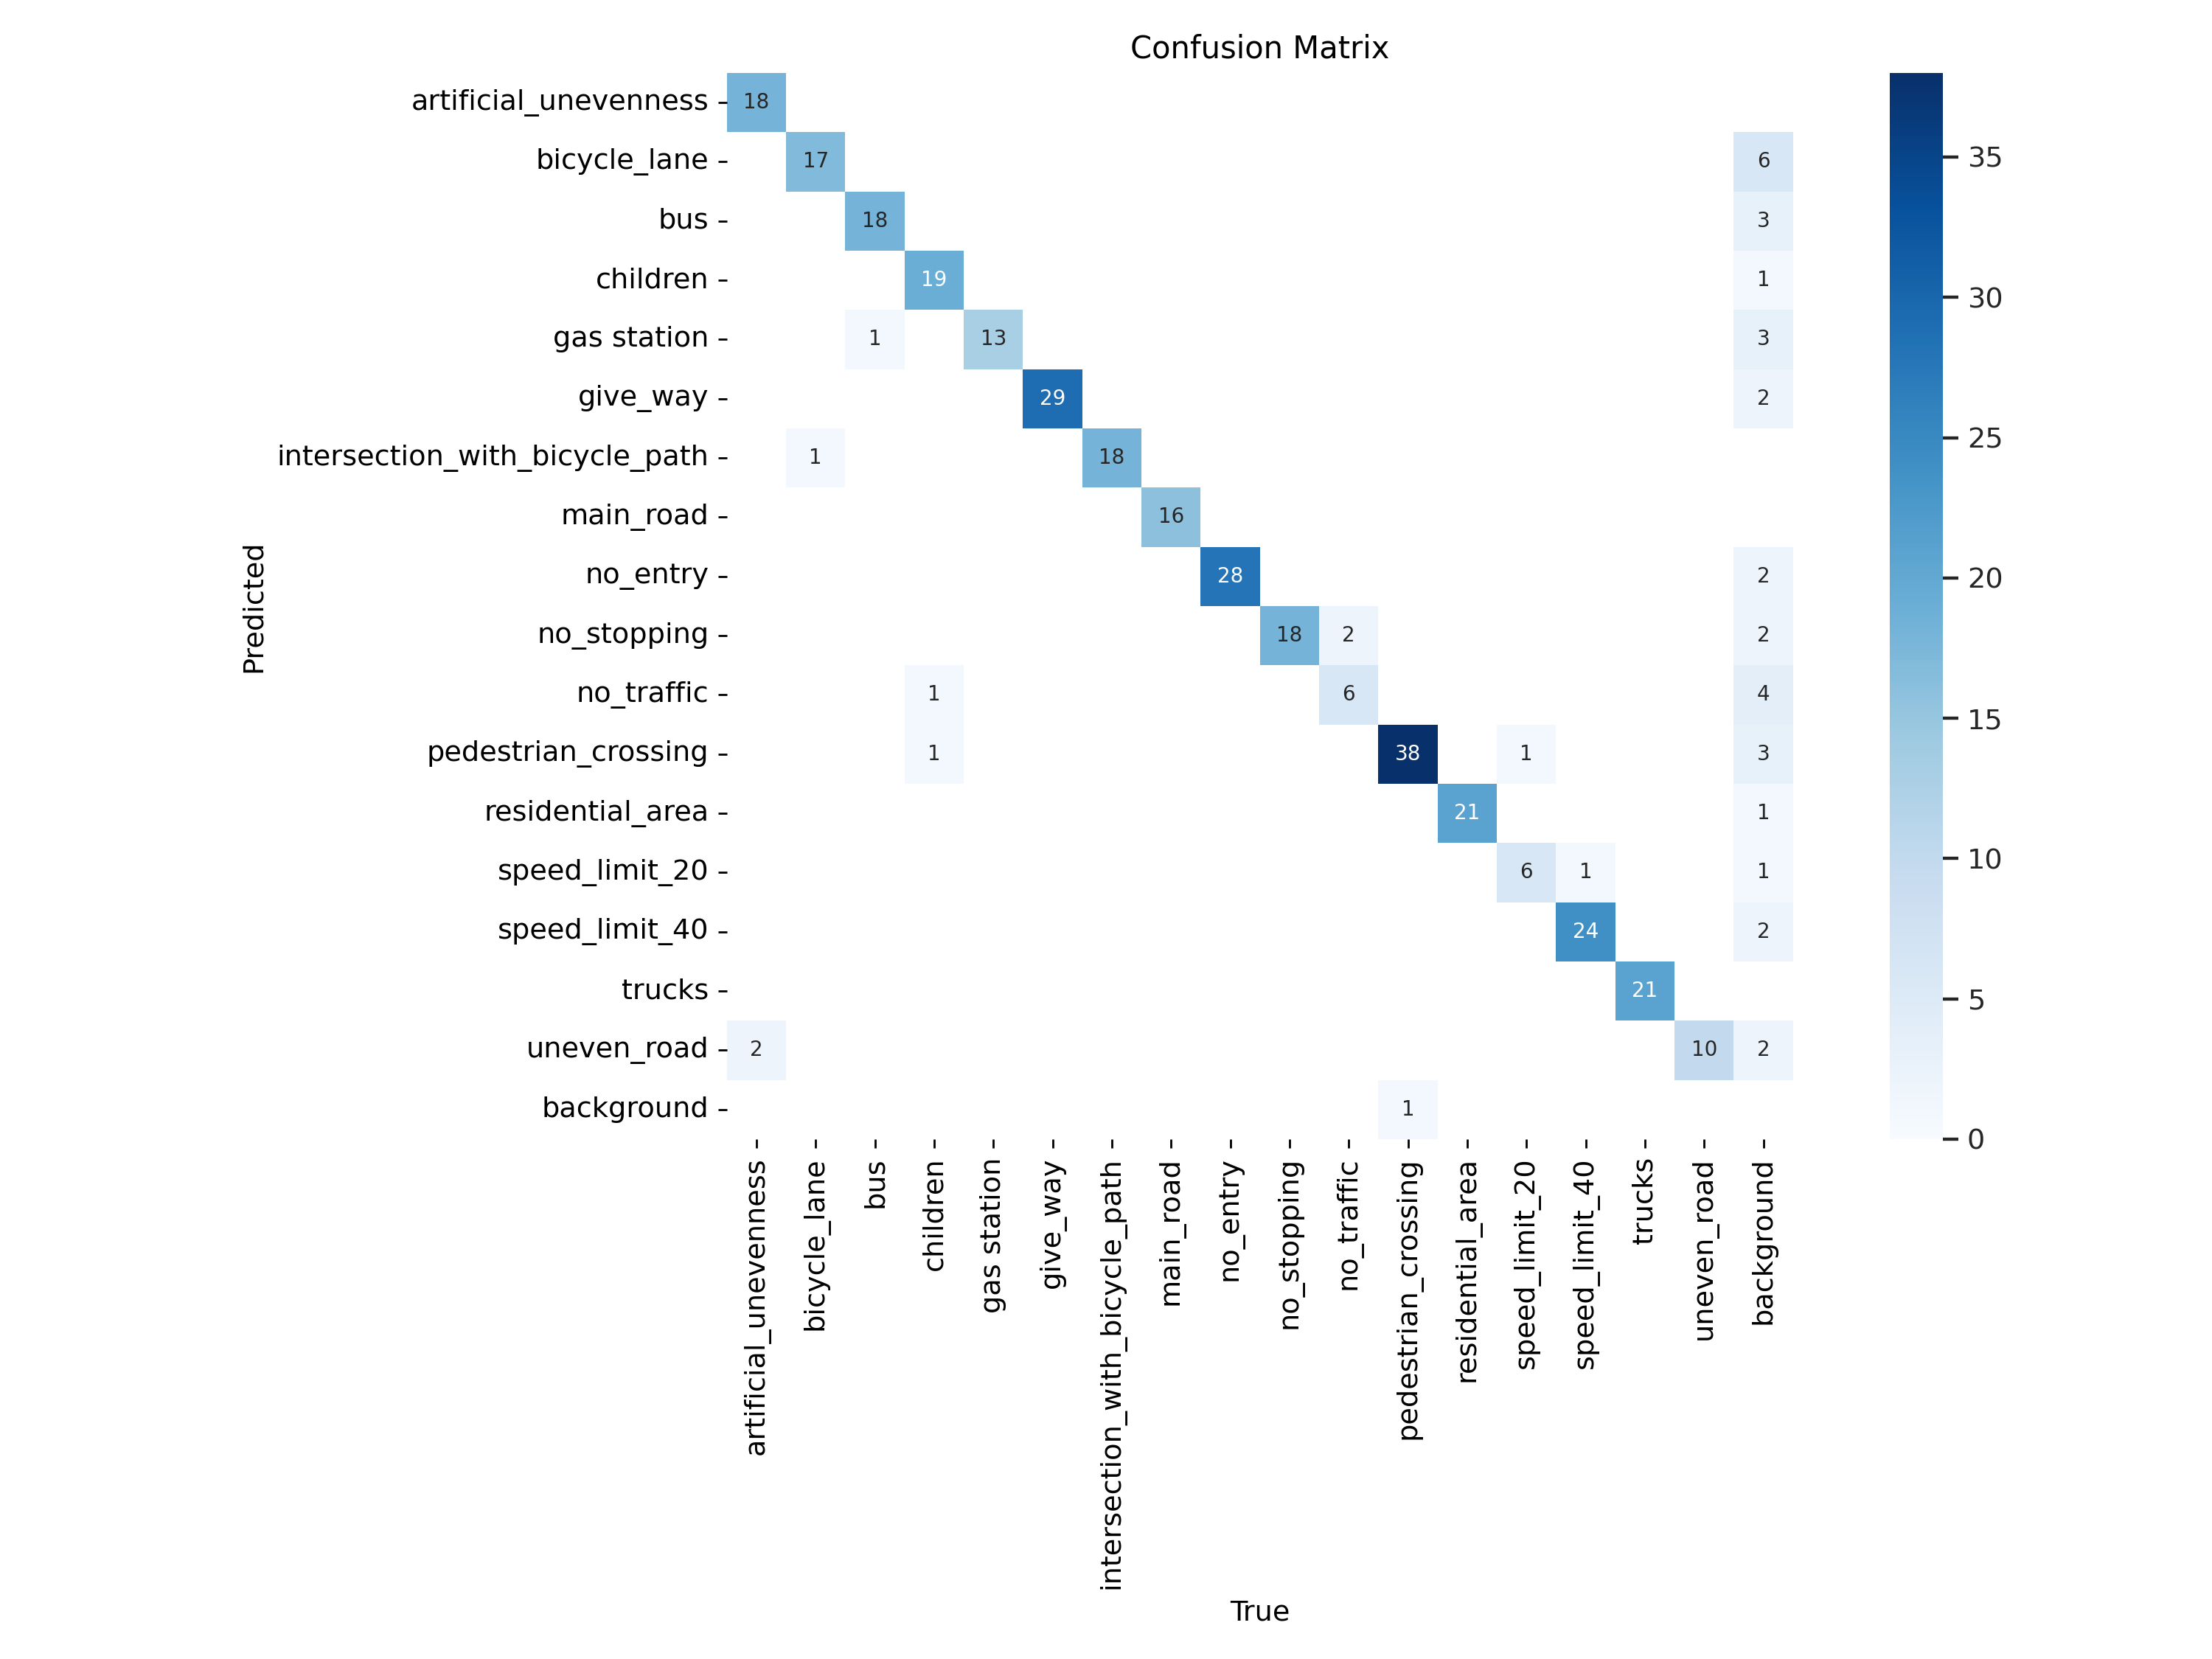

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


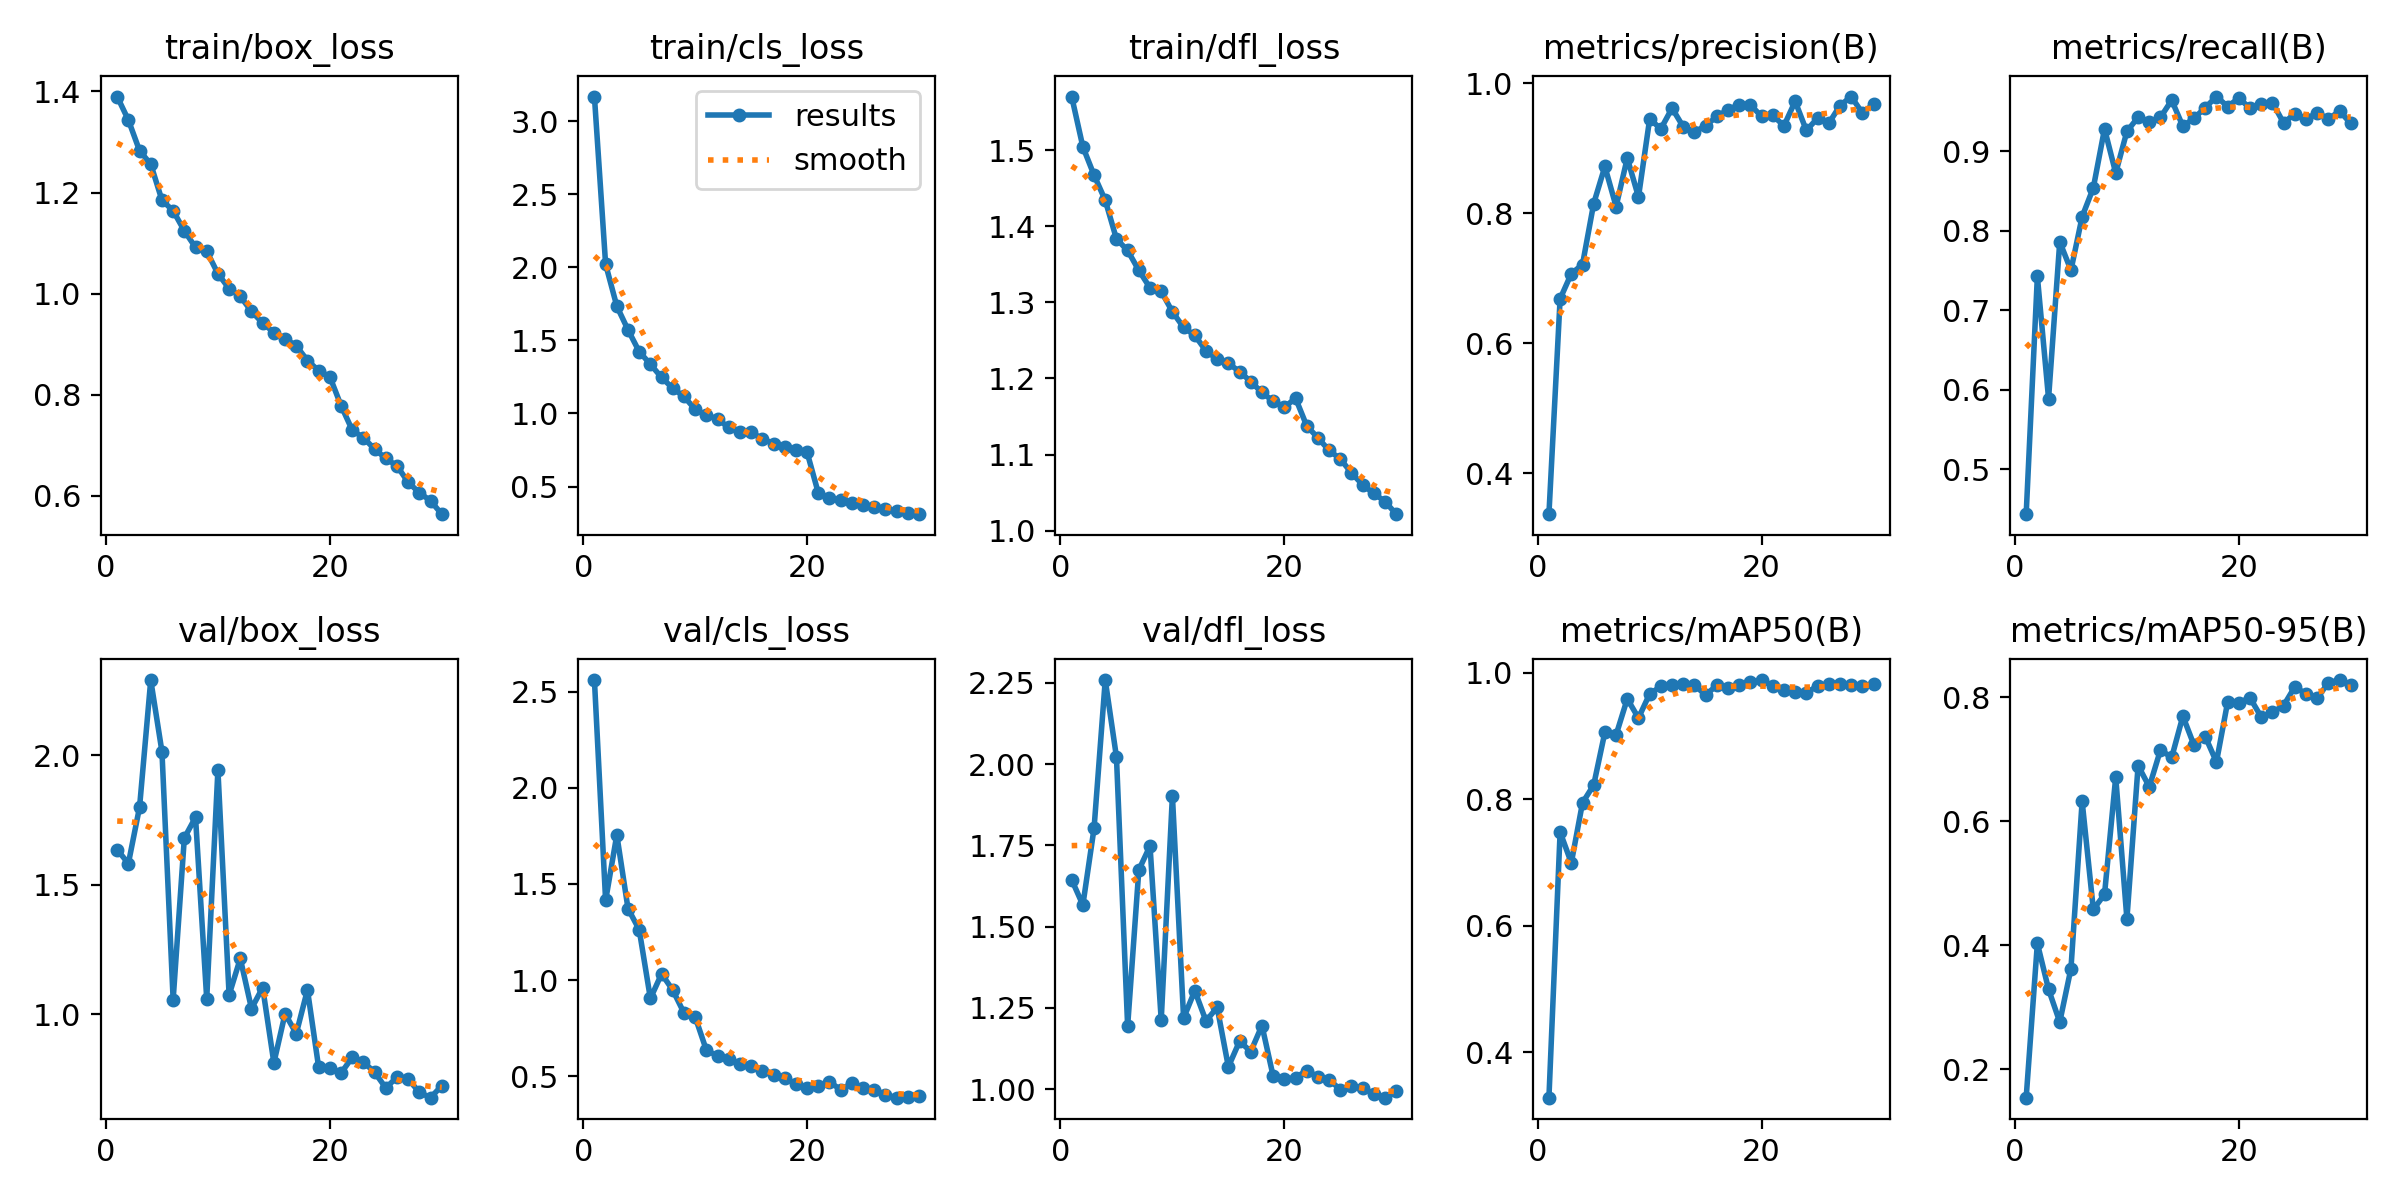

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


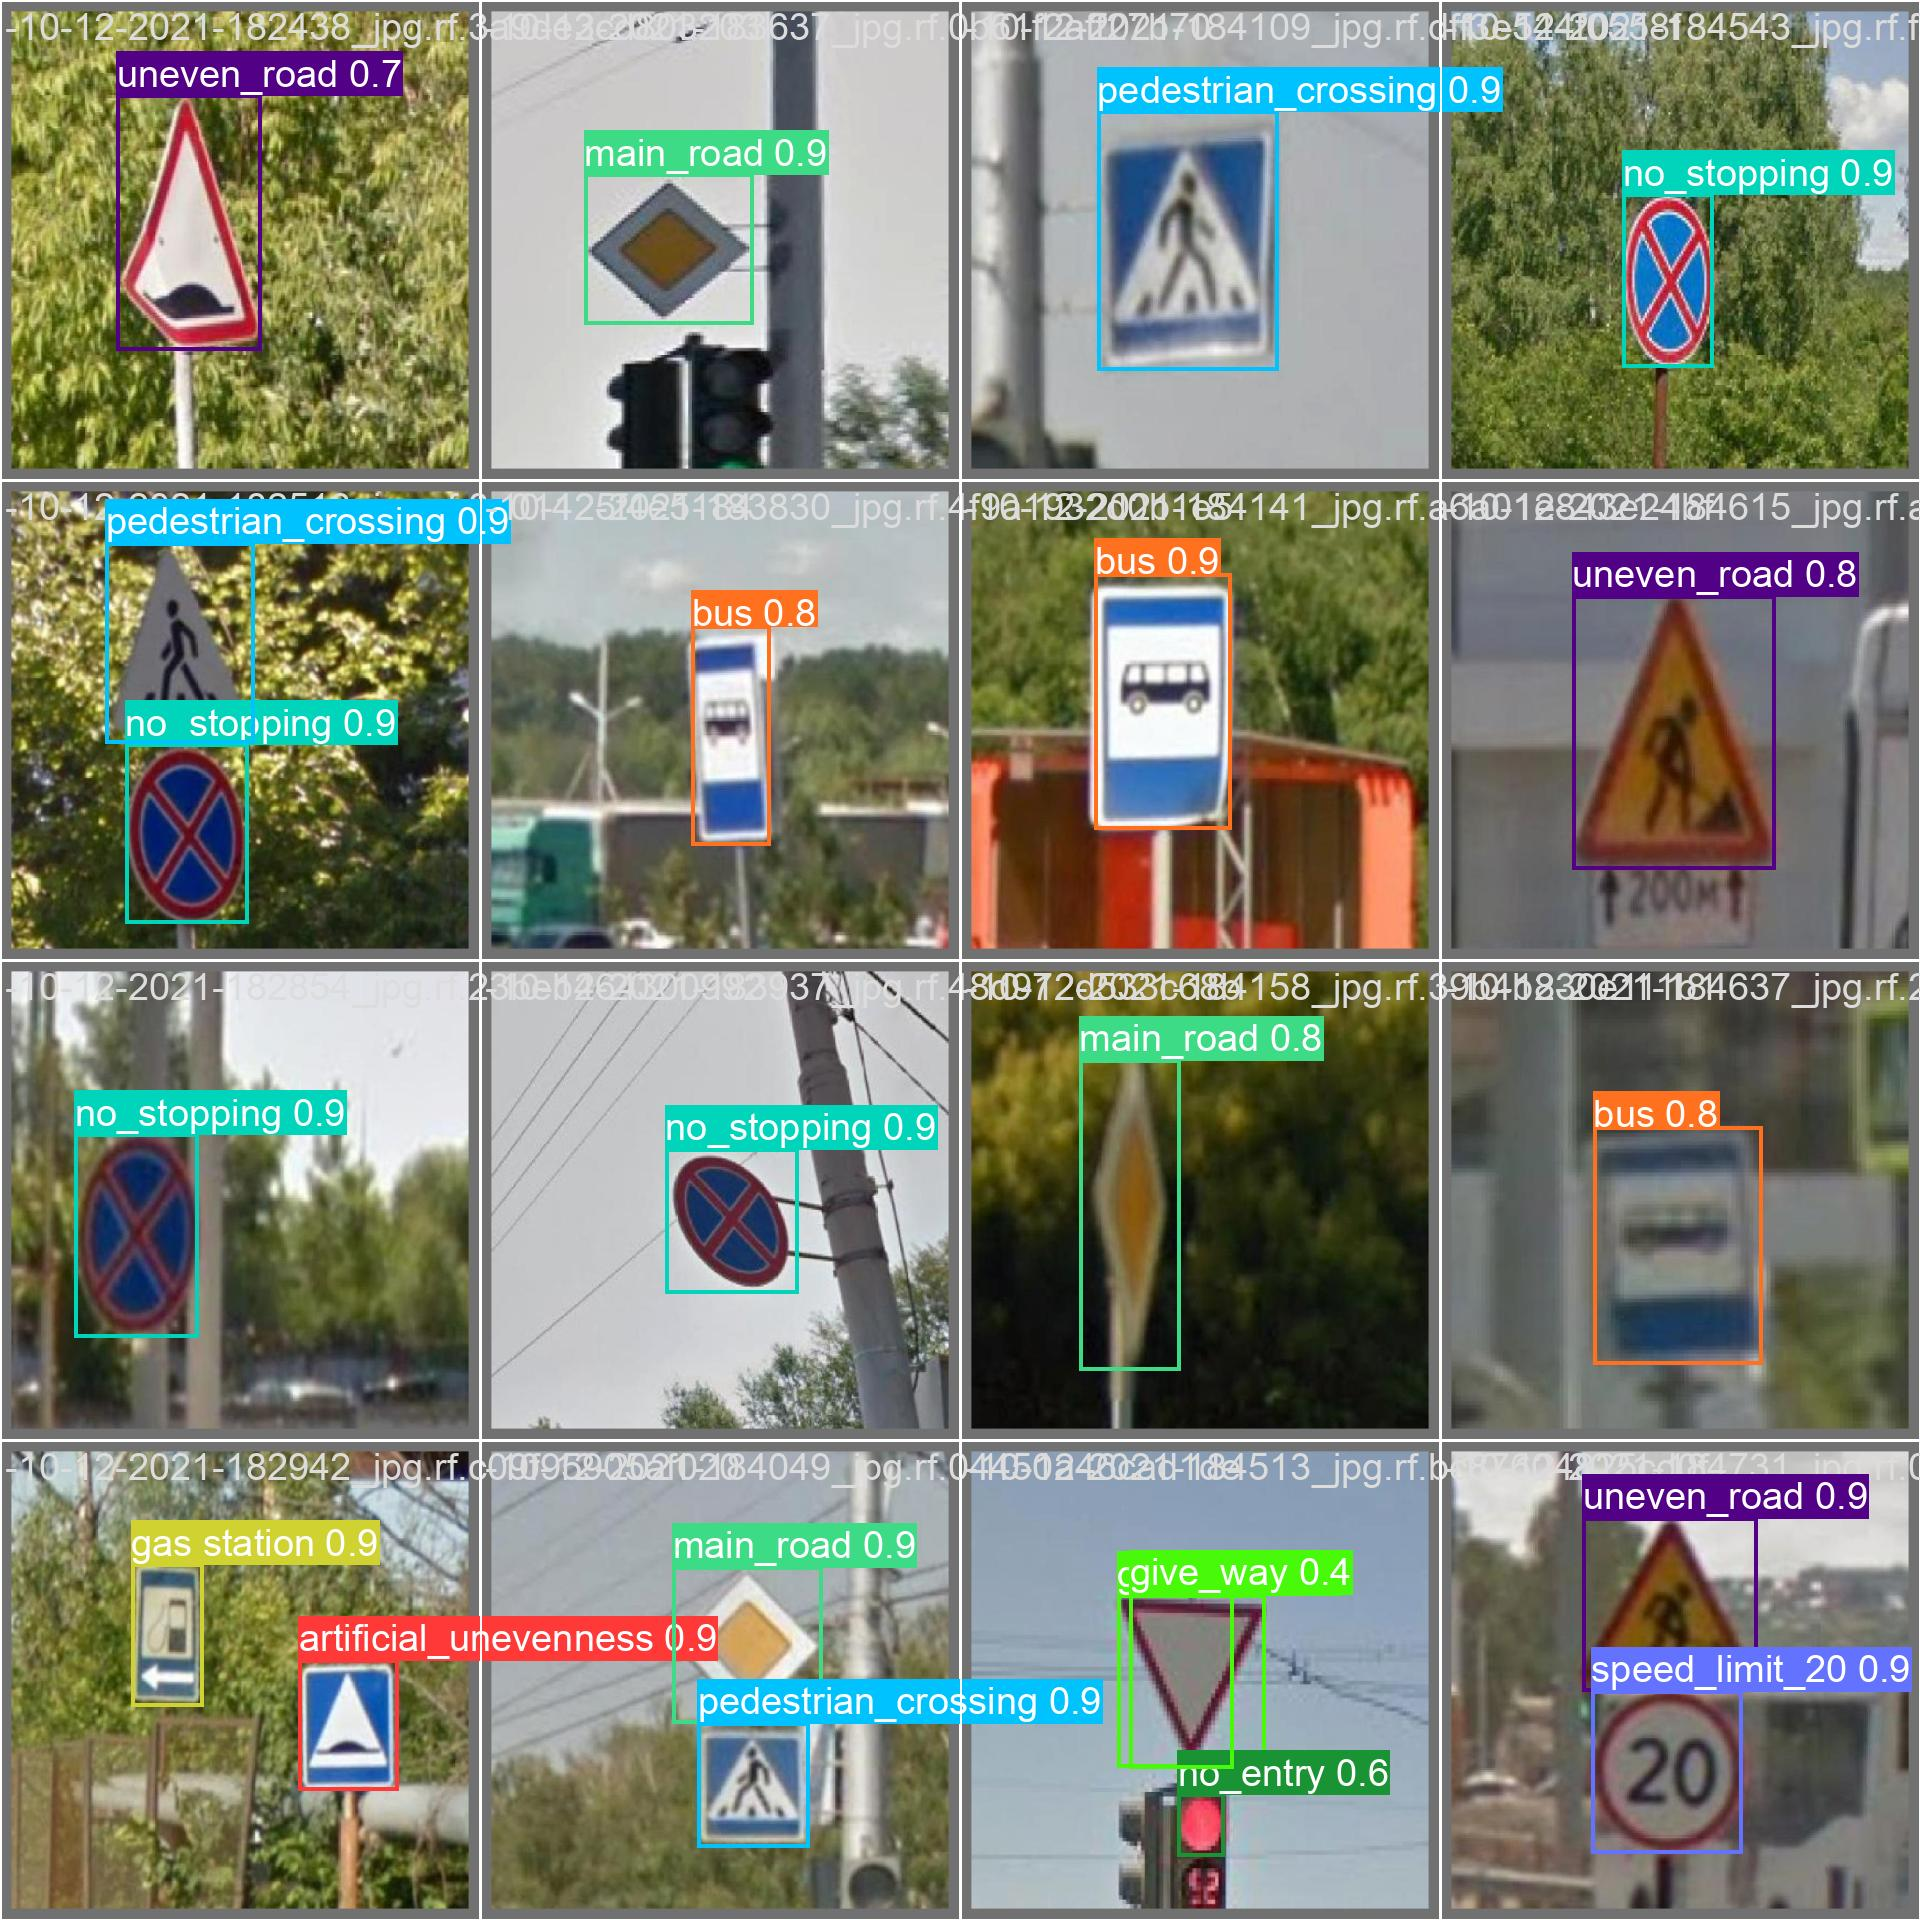

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch2_pred.jpg', width=600)

In [15]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008963 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/road2-5/valid/labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100% 250/250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [00:06<00:00,  2.31it/s]
                   all        250        331      0.954      0.951      0.979      0.827
 artificial_unevenness        250         20          1      0.911      0.995      0.869
          bicycle_lane        250         18      0.946      0.975      0.992      0.849
                   bus        250         19      0.938      0.947      0.984      0.813
              children        250         21          1      0.918      0.992      0.835
           gas station        250         13      0.961          1      0.995      0.859
              give_way        250 

In [16]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.5 iou=0.5 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008963 parameters, 0 gradients, 8.1 GFLOPs

image 1/129 /content/datasets/road2-5/test/images/-09-12-2021-182854_jpg.rf.46d1d75410a49ffc7753666ca4ec4c07.jpg: 640x640 1 gas station, 15.6ms
image 2/129 /content/datasets/road2-5/test/images/-09-12-2021-183105_jpg.rf.d5f5d446e02fb2ff06a46ae7cdb1f130.jpg: 640x640 1 pedestrian_crossing, 8.2ms
image 3/129 /content/datasets/road2-5/test/images/-09-12-2021-183145_jpg.rf.10cb5d7bc5dd2cb624aaa4e958045364.jpg: 640x640 1 bus, 8.8ms
image 4/129 /content/datasets/road2-5/test/images/-09-12-2021-183155_jpg.rf.d9fa6fce49f20e8553dd68f721039f0a.jpg: 640x640 1 pedestrian_crossing, 7.6ms
image 5/129 /content/datasets/road2-5/test/images/-09-12-2021-183929_jpg.rf.dd3ef1a84e1ab013f470b8fcafb1f504.jpg: 640x640 1 gas station, 1 no_stopping, 8.1ms
image 6/129 /content/datasets/road2-5/test/images/-09-12-2021-184024_jpg.rf.f4ae7d96

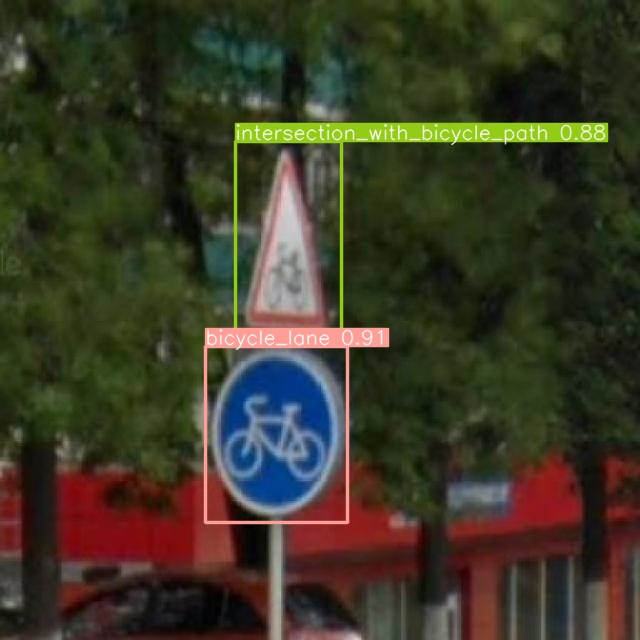

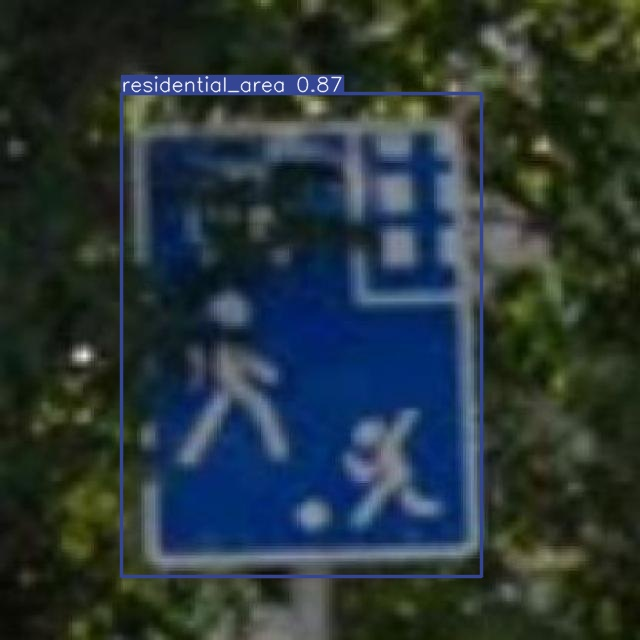

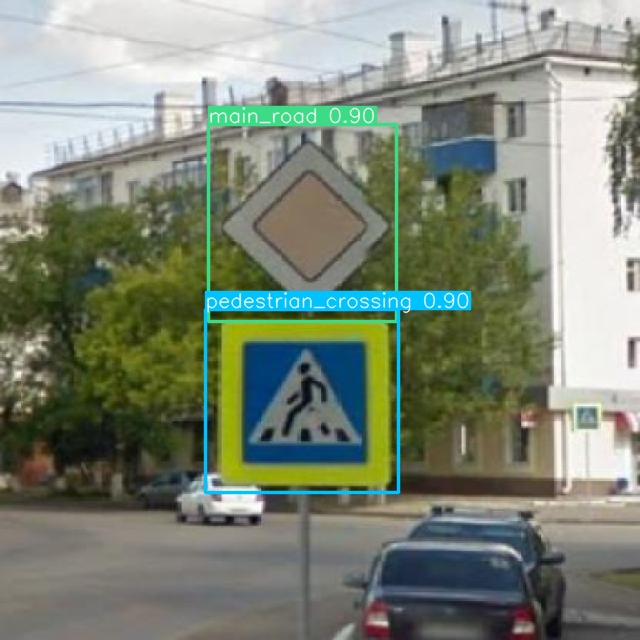

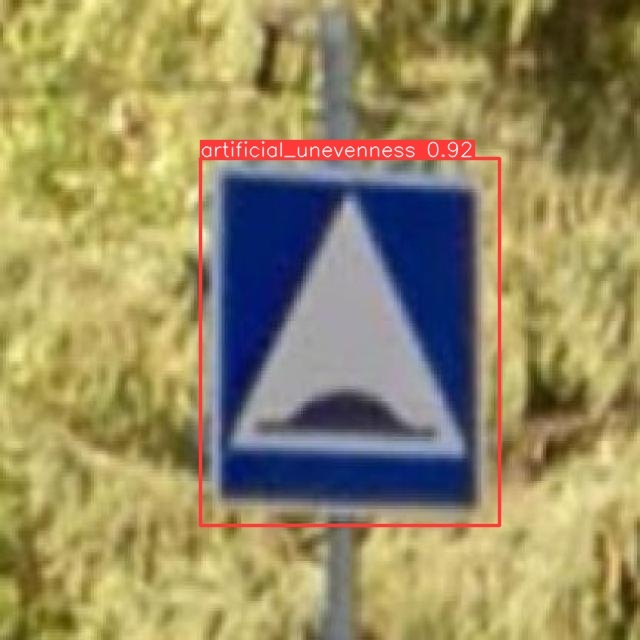

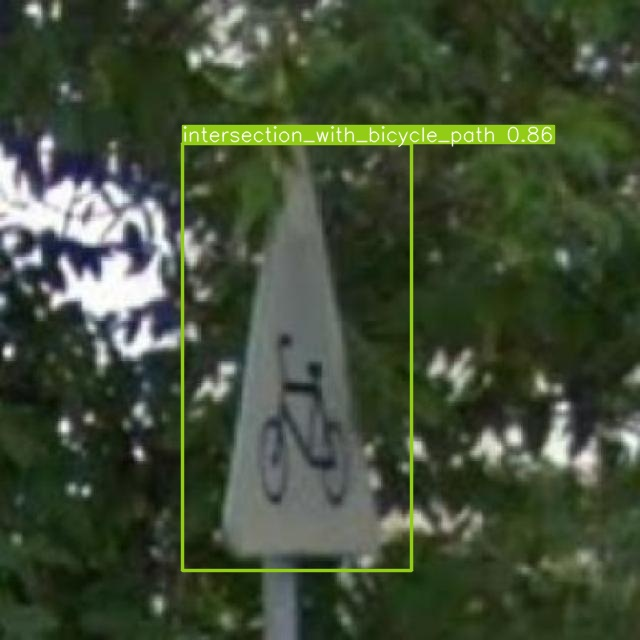

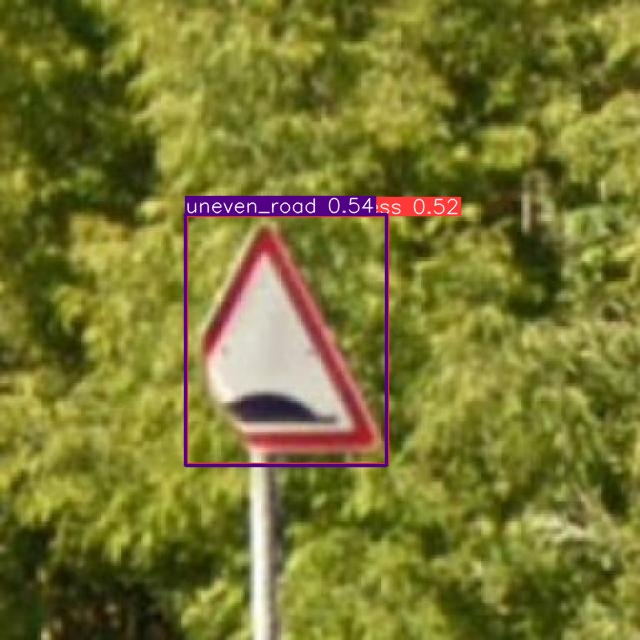

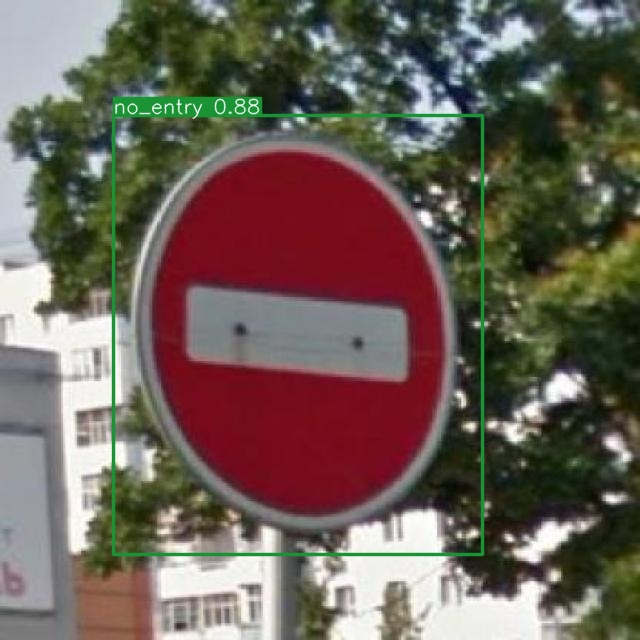

In [17]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[1:8]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [18]:
!scp -r /content/runs '/content/drive/MyDrive/Road/yolo-8-RoadSigns2'

cp: cannot create directory '/content/drive/MyDrive/Road/yolo-8-RoadSigns2': No such file or directory


In [19]:
project.version(5).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.0.216, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
2023-11-23 11:18:06,254 - clearml.model - INFO - Selected model id: 49fcd99782424ed7b444b97ccc09b2ef
2023-11-23 11:18:08,995 - clearml.frameworks - INFO - Found existing registered model id=c2495788cdbf471d938e7955210faf48 [/content/runs/detect/train/state_dict.pt] reusing it.
View the status of your deployment at: https://app.roboflow.com/ilya-stmnk/road2-enpmd/5
Share your model with the world at: https://universe.roboflow.com/ilya-stmnk/road2-enpmd/model/5


In [20]:
# Предполагается, что 'task' уже инициализирован, как показано выше
# Путь к файлу весов модели, который вы хотите загрузить
weights_file_path = '/content/runs/detect/train/weights/best.pt'

# Загрузка файла весов модели как артефакта в ClearML
task.upload_artifact(name='yolo_8_the_best', artifact_object=weights_file_path)


True

In [22]:
from clearml import Dataset

# Создаем новый датасет в ClearML
dataset = Dataset.create(
    dataset_project='Road',  # Имя проекта в ClearML
    dataset_name='Road_Dataset_1'  # Имя вашего датасета
)

# Добавляем файлы в датасет
dataset.add_files('/content/datasets/road2-5')

# Загружаем датасет в хранилище ClearML
dataset.upload()

# Завершаем создание датасета
dataset.finalize()


ClearML results page: https://app.clear.ml/projects/efd26ca0943147a9b3bc8f168b681c59/experiments/627b1dc6f09549b5a662a1361f40d653/output/log
ClearML dataset page: https://app.clear.ml/datasets/simple/efd26ca0943147a9b3bc8f168b681c59/experiments/627b1dc6f09549b5a662a1361f40d653
Generating SHA2 hash for 11293 files


100%|██████████| 11293/11293 [00:03<00:00, 3509.22it/s]


Hash generation completed
Uploading dataset changes (5713 files compressed to 397.26 MiB) to https://files.clear.ml
Uploading dataset changes (5580 files compressed to 387.53 MiB) to https://files.clear.ml
File compression and upload completed: total size 784.79 MiB, 2 chunk(s) stored (average size 392.4 MiB)


True

In [23]:
task.close()